# Character metadata

In [1]:
import pandas as pd

characters_columns = [
    "character_id",
    "character_name",
    "movie_id",
    "movie_title",
    "gender",
    "position",
]
characters_metadata = pd.read_csv(
    "./data/raw/cornell movie-dialogs corpus/movie_characters_metadata.txt",
    error_bad_lines=False,
    header=None,
    names=characters_columns,
    sep=" \+\+\+\$\+\+\+ ",
    encoding="latin-1",
)
characters_metadata.gender = characters_metadata.gender.str.lower()
characters_metadata_with_gender = characters_metadata[
    characters_metadata.gender.str.lower().isin(["m", "f"])
]
characters_metadata_with_gender_and_position = characters_metadata_with_gender[
    characters_metadata_with_gender.position != "?"
]
characters_metadata_with_gender_and_position.position = (
    characters_metadata_with_gender_and_position.position.astype(int)
)


/Users/thomas/Projects/personal/bechdel/venv/lib/python3.7/site-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)
/Users/thomas/Projects/personal/bechdel/venv/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3457: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)
/Users/thomas/Projects/personal/bechdel/venv/lib/python3.7/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.

In [2]:
import plotly_express as px
px.histogram(characters_metadata_with_gender, x="gender")

In [3]:
px.histogram(characters_metadata_with_gender_and_position[characters_metadata_with_gender_and_position.position < 100],
             x="position" , color="gender", barmode="stack")

In [4]:
px.histogram(characters_metadata_with_gender_and_position[characters_metadata_with_gender_and_position.position < 100],
             x="position" , color="gender", barmode="stack", barnorm="percent", nbins=50)

In [5]:
len(characters_metadata_with_gender_and_position)

2679

# Movie metadata

In [6]:
movie_columns = [
    "movie_id",
    "movie_title",
    "movie_year",
    "imdb_rating",
    "imdb_votes",
    "genres",
]

movie_metadata = pd.read_csv(
    "./data/raw/cornell movie-dialogs corpus/movie_titles_metadata.txt",
    error_bad_lines=False,
    header=None,
    names=movie_columns,
    sep=" \+\+\+\$\+\+\+ ",
    encoding="latin-1",
)
movie_metadata.movie_year = movie_metadata.movie_year.str.replace("/I", "").astype(int)
movie_metadata.genres = movie_metadata.genres.apply(eval)

/Users/thomas/Projects/personal/bechdel/venv/lib/python3.7/site-packages/pandas/util/_decorators.py:311: ParserWarning:

Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.

/Users/thomas/Projects/personal/bechdel/venv/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3457: FutureWarning:

The error_bad_lines argument has been deprecated and will be removed in a future version.





In [7]:
px.histogram(movie_metadata, x="movie_year")

In [8]:
px.histogram(movie_metadata, x="imdb_rating")

In [9]:
px.histogram(movie_metadata, x="imdb_votes")

# Metadata

In [10]:
metadata = characters_metadata.merge(movie_metadata)

In [11]:
px.histogram(metadata[metadata.gender != "?"], x="movie_year", color="gender")

In [12]:
fig = px.histogram(metadata[metadata.gender != "?"], x="movie_year", color="gender", barmode="stack", barnorm="percent", nbins=50)
fig.add_hline(y=50)

=> no clear trend between year and gender representativity

In [13]:
fig = px.histogram(metadata[metadata.gender != "?"], x="imdb_rating", color="gender", barmode="stack", barnorm="percent", nbins=50)
fig.add_hline(y=50)

In [14]:
px.histogram(metadata.explode("genres"), x="genres").update_xaxes(categoryorder="total descending")

In [15]:
fig = px.histogram(metadata[metadata.gender != "?"].explode("genres"), x="genres", color="gender", barmode="stack", barnorm="percent")
fig.add_hline(y=50)

# Conversations

In [16]:
lines_columns = ["line_id", "character_id", "movie_id", "character_name", "text"]

lines = pd.read_csv(
    "./data/raw/cornell movie-dialogs corpus/movie_lines.txt",
    error_bad_lines=False,
    header=None,
    names=lines_columns,
    sep=" \+\+\+\$\+\+\+ ",
    encoding="latin-1",
)

In [17]:
lines

,line_id,character_id,movie_id,character_name,text
0,L1045,u0,m0,BIANCA,They do not!
1,L1044,u2,m0,CAMERON,They do to!
2,L985,u0,m0,BIANCA,I hope so.
3,L984,u2,m0,CAMERON,She okay?
4,L925,u0,m0,BIANCA,Let's go.
...,...,...,...,...,...
304708,L666371,u9030,m616,DURNFORD,Lord Chelmsford seems to want me to stay back ...
304709,L666370,u9034,m616,VEREKER,I'm to take the Sikali with the main column to...
304710,L666369,u9030,m616,DURNFORD,"Your orders, Mr Vereker?"
304711,L666257,u9030,m616,DURNFORD,"Good ones, yes, Mr Vereker. Gentlemen who can ..."


In [18]:
conversations_columns = [
    "first_character_id",
    "second_character_id",
    "movie_id",
    "text_order",
]

conversations = pd.read_csv(
    "./data/raw/cornell movie-dialogs corpus/movie_conversations.txt",
    error_bad_lines=False,
    header=None,
    names=conversations_columns,
    sep=" \+\+\+\$\+\+\+ ",
    encoding="latin-1",
)
conversations.text_order = conversations.text_order.apply(eval)


/Users/thomas/Projects/personal/bechdel/venv/lib/python3.7/site-packages/pandas/util/_decorators.py:311: ParserWarning:

Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.

/Users/thomas/Projects/personal/bechdel/venv/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3457: FutureWarning:

The error_bad_lines argument has been deprecated and will be removed in a future version.





In [19]:
conversations_flat = conversations.explode("text_order").rename_axis('conversation_id').reset_index()

In [20]:
corpus = conversations_flat.merge(lines, left_on="text_order", right_on="line_id").merge(characters_metadata_with_gender, left_on="character_id", right_on="character_id")

In [21]:
corpus.head()

,conversation_id,first_character_id,second_character_id,movie_id_x,text_order,line_id,character_id,movie_id_y,character_name_x,text,character_name_y,movie_id,movie_title,gender,position
0,0,u0,u2,m0,L194,L194,u0,m0,BIANCA,Can we make this quick? Roxanne Korrine and A...,BIANCA,m0,10 things i hate about you,f,4
1,0,u0,u2,m0,L196,L196,u0,m0,BIANCA,Not the hacking and gagging and spitting part....,BIANCA,m0,10 things i hate about you,f,4
2,1,u0,u2,m0,L198,L198,u0,m0,BIANCA,You're asking me out. That's so cute. What's ...,BIANCA,m0,10 things i hate about you,f,4
3,2,u0,u2,m0,L200,L200,u0,m0,BIANCA,"No, no, it's my fault -- we didn't have a prop...",BIANCA,m0,10 things i hate about you,f,4
4,2,u0,u2,m0,L202,L202,u0,m0,BIANCA,"The thing is, Cameron -- I'm at the mercy of a...",BIANCA,m0,10 things i hate about you,f,4


In [22]:
gender_conversation = corpus.groupby(["movie_id", "conversation_id"]).gender.nunique().reset_index()

In [37]:
movies_with_women = corpus.groupby("movie_id").filter(lambda x: x.gender.nunique() == 2).movie_id.unique().tolist()
movie_metadata["is_with_women"] = movie_metadata.movie_id.isin(movies_with_women)
movie_metadata.is_with_women.value_counts(normalize=True)

True     0.841167
False    0.158833
Name: is_with_women, dtype: float64

In [33]:
women_talking_movies = gender_conversation.groupby("movie_id").filter(lambda x: (x.gender == 2).any()).movie_id.unique().tolist()
movie_metadata["are_women_talking"] = movie_metadata.movie_id.isin(women_talking_movies)
movie_metadata.are_women_talking.value_counts(normalize=True)

True     0.836305
False    0.163695
Name: are_women_talking, dtype: float64

In [25]:
px.histogram(movie_metadata, x="movie_year", color="are_women_talking", nbins=50)

In [26]:
px.histogram(movie_metadata, x="movie_year", color="are_women_talking", barnorm="percent", nbins=50)

# Conversations - deep dive

In [38]:
corpus_with_women_talking = corpus[corpus.movie_id.isin(women_talking_movies)]

In [103]:
import spacy

nlp = spacy.load("en_core_web_sm", disable=["ner", "tok2vec"])

In [104]:
def extract_tokens(t):
    return [token.lemma_ for token in nlp(str(t)) if token.is_alpha and not token.is_stop and not token.is_punct]

In [105]:
dialog_tags = corpus_with_women_talking[corpus_with_women_talking.gender == "f"].text.apply(extract_tokens)

In [106]:
corpus_with_women_talking["tags"] = dialog_tags

/Users/thomas/Projects/personal/bechdel/venv/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



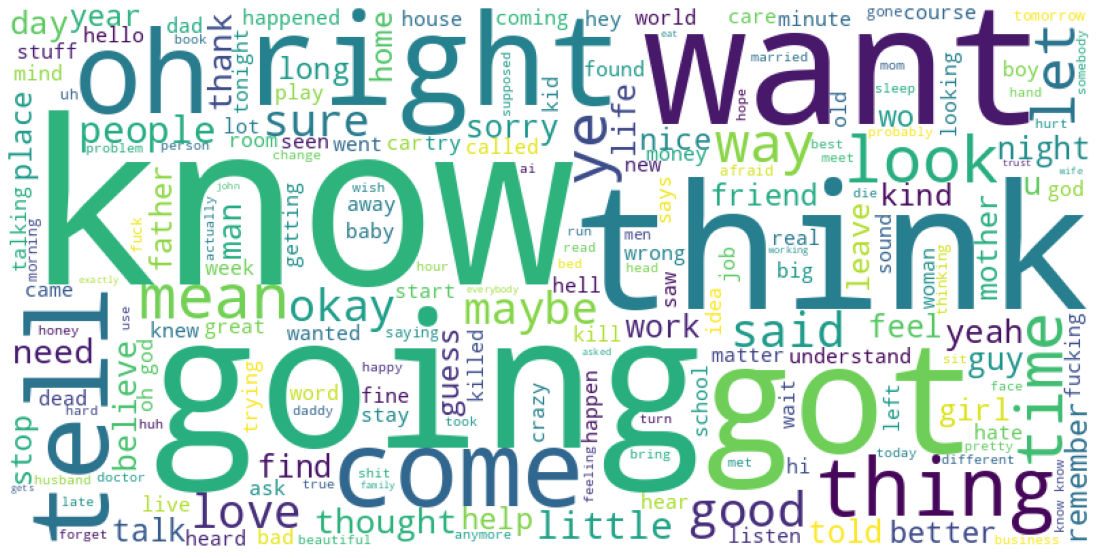

In [107]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

wordcloud = WordCloud(background_color = 'white', width=800, height=400)
wordcloud.generate_from_text(" ".join(dialog_tags.explode().dropna().tolist()))
plt.figure( figsize=(20,10) )
plt.imshow(wordcloud)
plt.axis("off")
plt.show();